In [1]:
from core import *
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../Data"

In [3]:
train_scene_path = scenes_paths(DATA_PATH + "/train")

In [4]:
train_scene_path[:3]

['../Data/train/RED/imgset0530',
 '../Data/train/RED/imgset0154',
 '../Data/train/RED/imgset0366']

## Bicubic scaling of images

In [5]:
bicubic_upscaling_images = [ upscaling_scene_images(scene) for scene in train_scene_path]

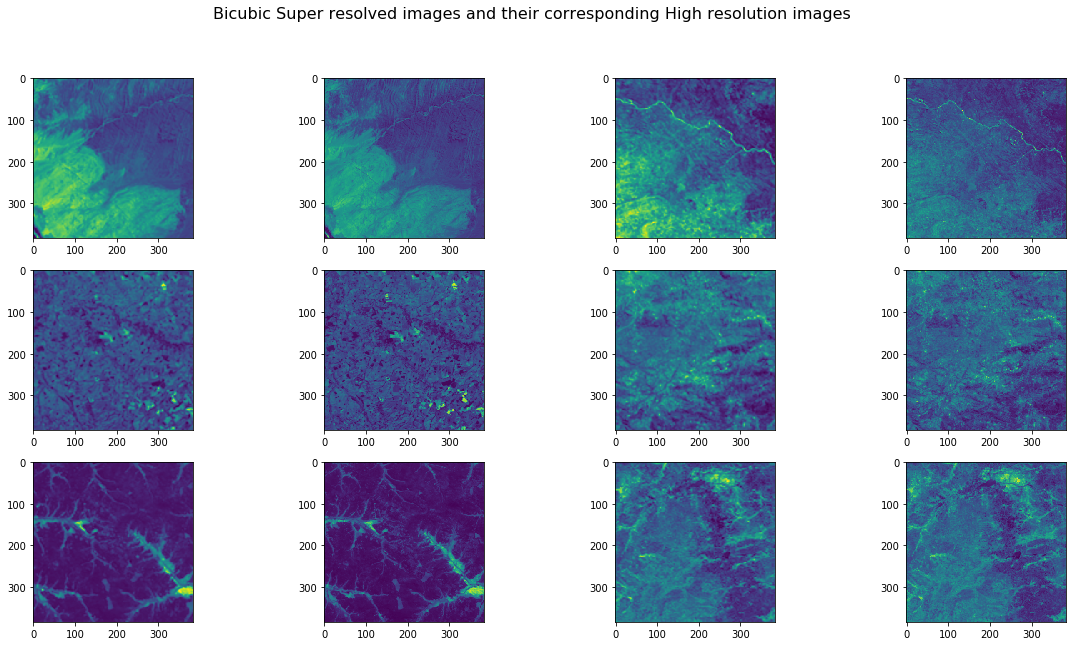

In [6]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Bicubic Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(bicubic_upscaling_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(bicubic_upscaling_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

Scoring bicubic super resolved images against the High resolution images using **cPSNR metric** defined in the competition

In [7]:
scores = [score_image(i, s) for i,s in zip(bicubic_upscaling_images, train_scene_path)]

In [8]:
print(np.mean(scores))

1.0


## Super resolution images by taking mean

In [20]:
mean_images = [mean_image_scene(scene) for scene in train_scene_path]

In [21]:
upscaling_mean_images = [bicubic_upscaling(image) for image in mean_images]

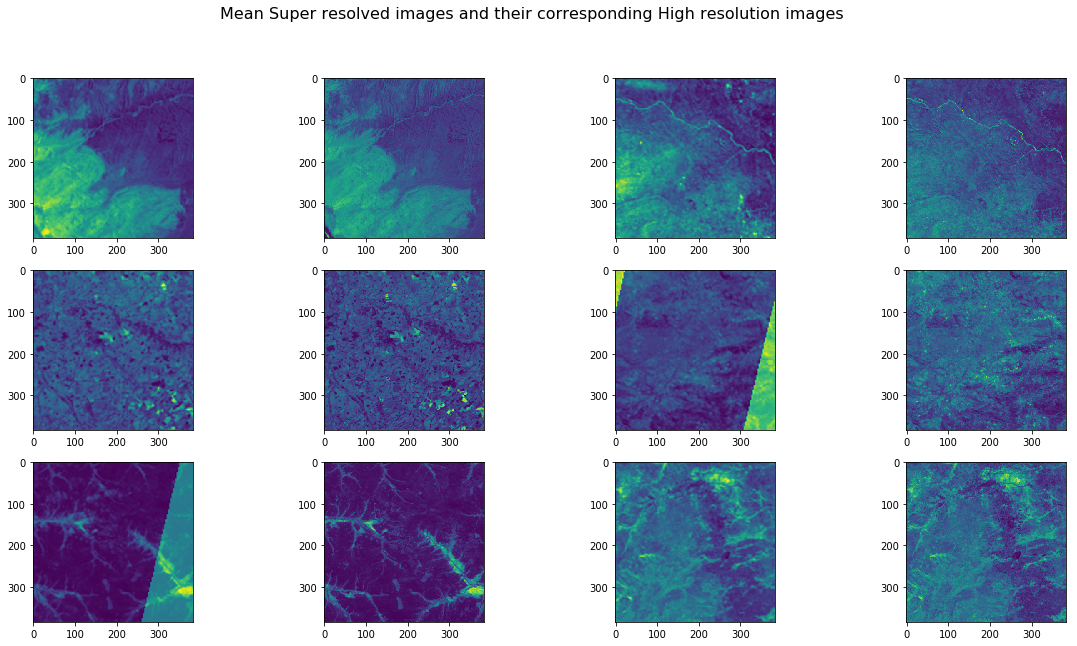

In [22]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mean Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mean_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mean_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [23]:
score = [score_image(i, s) for i,s in zip(upscaling_mean_images, train_scene_path)]

In [24]:
print(np.mean(score))

1.173904285949691


#### Generating Mean images by considering clear pixels only

In [25]:
mean_clear_images = [mean_image_scene(scene,with_clear = True,processing_type = "with_same_lr") for scene in train_scene_path]

In [26]:
upscaling_mean_images = [bicubic_upscaling(image) for image in mean_clear_images]

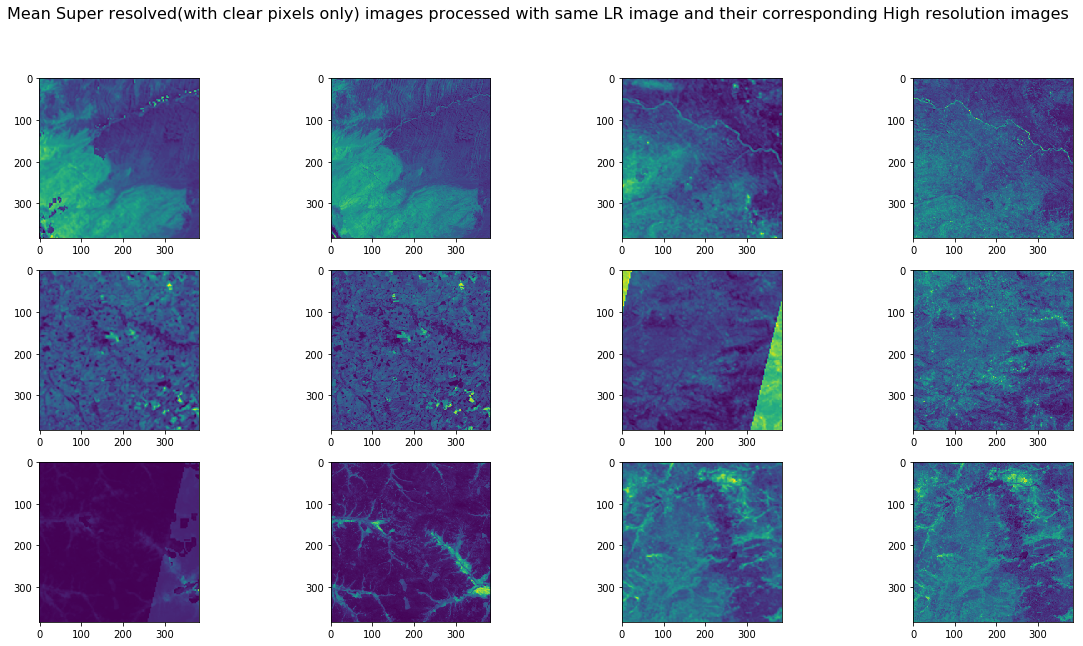

In [27]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mean Super resolved(with clear pixels only) images processed with same LR image and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mean_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mean_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [11]:
score = [score_image(i, s) for i,s in zip(upscaling_mean_images, train_scene_path)]

In [12]:
print(np.mean(score))

1.188506150764731


In [28]:
mean_clear_images = [mean_image_scene(scene,with_clear = True,processing_type = "with_all_lr") for scene in train_scene_path]

In [29]:
upscaling_mean_images = [bicubic_upscaling(image) for image in mean_clear_images]

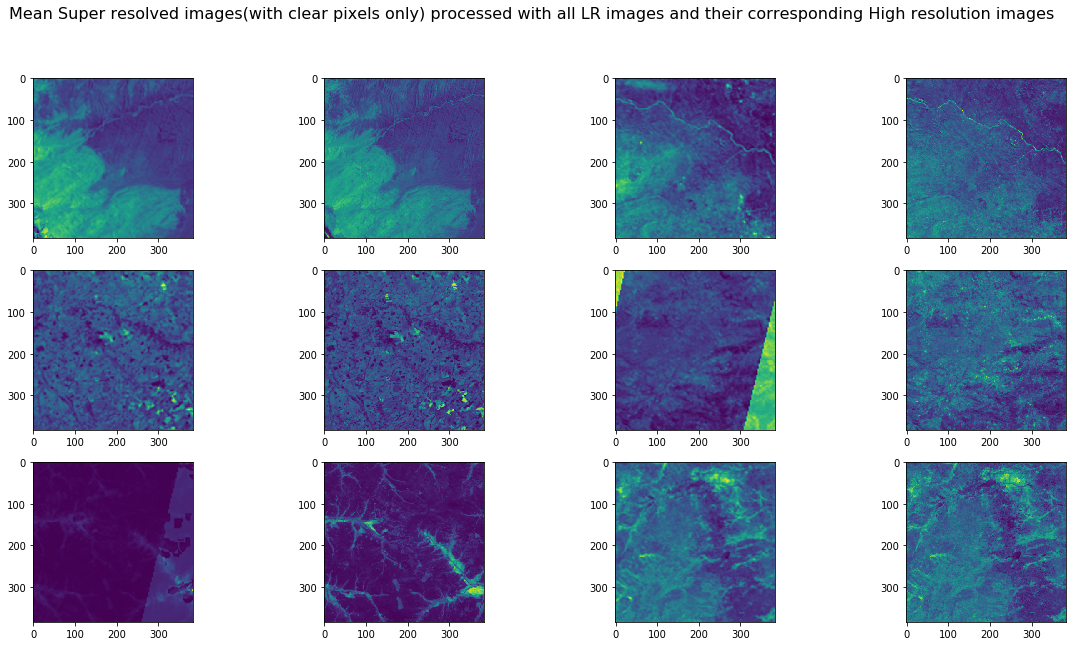

In [30]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mean Super resolved images(with clear pixels only) processed with all LR images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mean_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mean_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [15]:
score = [score_image(i, s) for i,s in zip(upscaling_mean_images, train_scene_path)]

In [16]:
print(np.mean(score))

1.188354175122656


## Super resolution images by taking median

In [10]:
median_images = [median_image_scene(scene) for scene in train_scene_path]

In [11]:
upscaling_median_images = [bicubic_upscaling(image) for image in median_images]

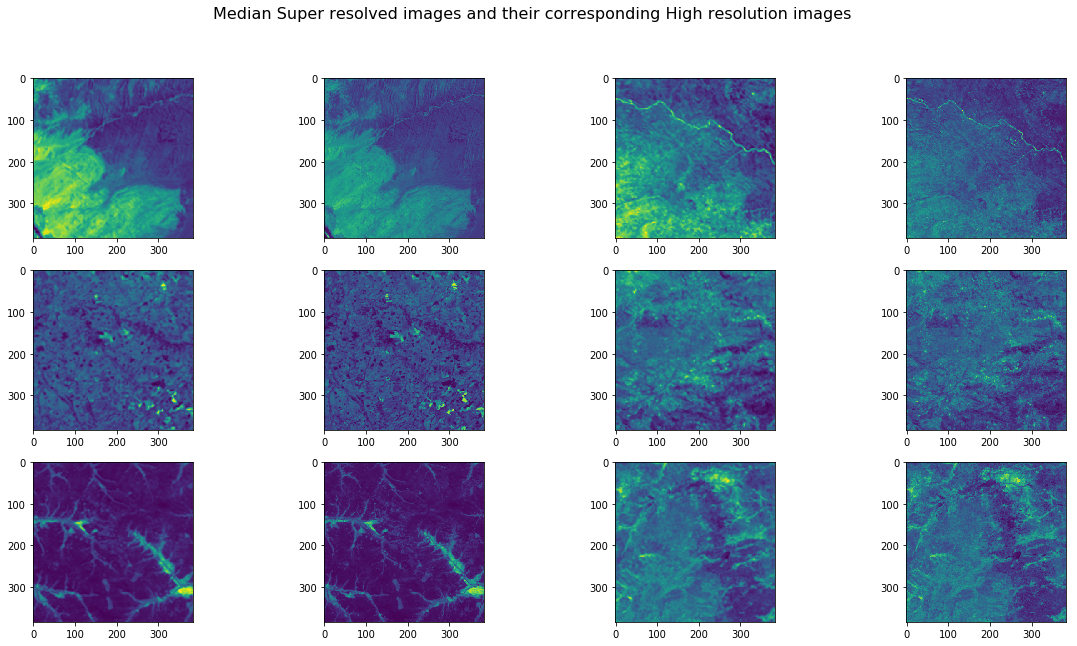

In [14]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Median Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_median_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_median_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [12]:
score = [score_image(i, s) for i,s in zip(upscaling_median_images, train_scene_path)]

In [13]:
print(np.mean(score))

0.9989850161697251


#### Generating Median images by considering clear pixels only

In [18]:
median_clear_images = [median_image_scene(scene,with_clear = True,processing_type = "with_same_lr") for scene in train_scene_path]

In [19]:
upscaling_median_clear_images = [bicubic_upscaling(image) for image in median_clear_images]

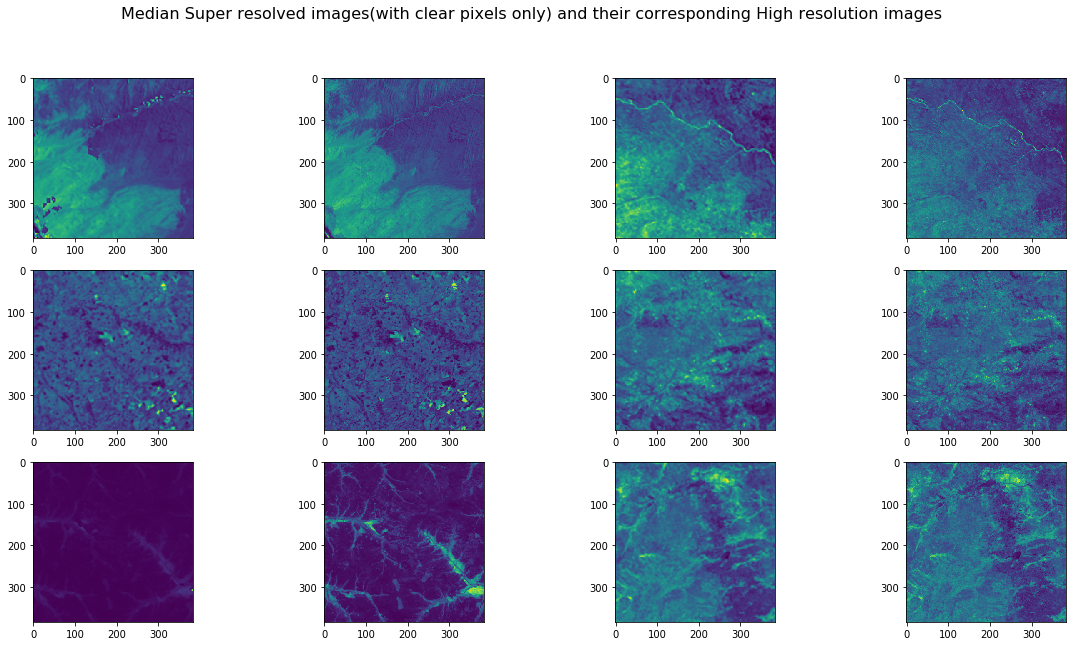

In [11]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Median Super resolved images(with clear pixels only)  processed with same LR images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_median_clear_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_median_clear_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [20]:
score = [score_image(i, s) for i,s in zip(upscaling_median_clear_images, train_scene_path)]

In [21]:
print(np.mean(score))

1.0065077455563294


In [31]:
median_clear_images = [median_image_scene(scene,with_clear = True,processing_type = "with_all_lr") for scene in train_scene_path]

In [32]:
upscaling_median_clear_images = [bicubic_upscaling(image) for image in median_clear_images]

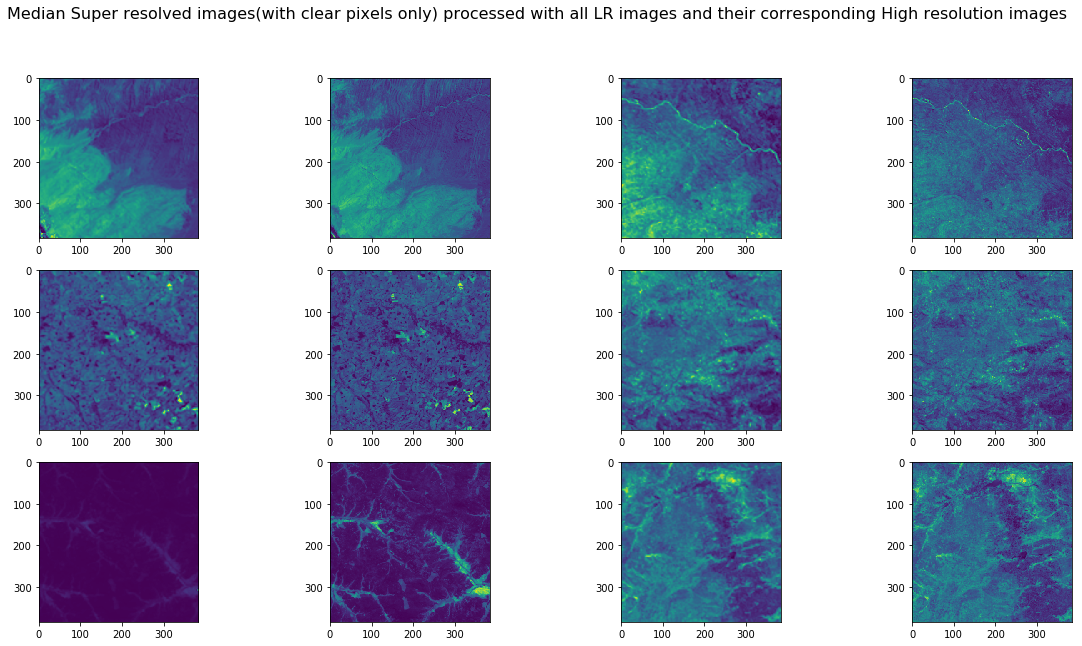

In [33]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Median Super resolved images(with clear pixels only) processed with all LR images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_median_clear_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_median_clear_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [24]:
score = [score_image(i, s) for i,s in zip(upscaling_median_clear_images, train_scene_path)]

In [25]:
print(np.mean(score))

1.0063329192317272


## Super resolution images by taking mode

In [34]:
mode_images = [mode_image_scene(scene) for scene in train_scene_path]

In [35]:
upscaling_mode_images = [bicubic_upscaling(image) for image in mode_images]

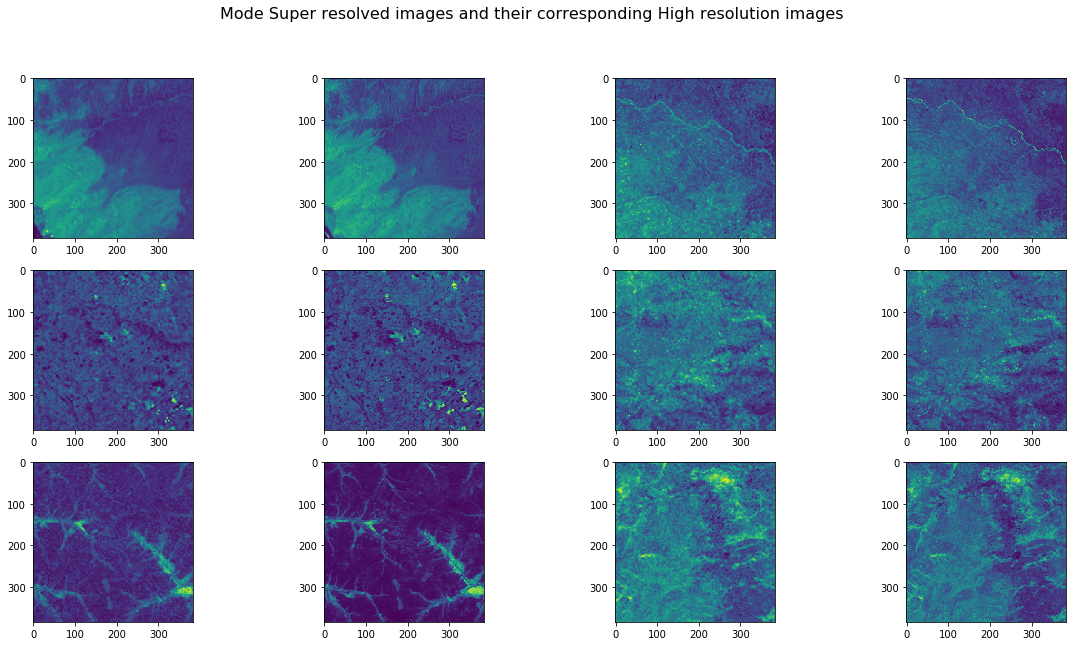

In [36]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mode Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mode_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mode_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [6]:
score = [score_image(i, s) for i,s in zip(upscaling_mode_images, train_scene_path)]

In [7]:
print(np.mean(score))

1.2490251403797492


#### Generating Mode images by considering clear pixels only

In [11]:
mode_clear_images = [mode_image_scene(scene,with_clear = True,processing_type = "with_same_lr") for scene in train_scene_path]

In [6]:
upscaling_mode_clear_images = [bicubic_upscaling(image) for image in mode_clear_images]

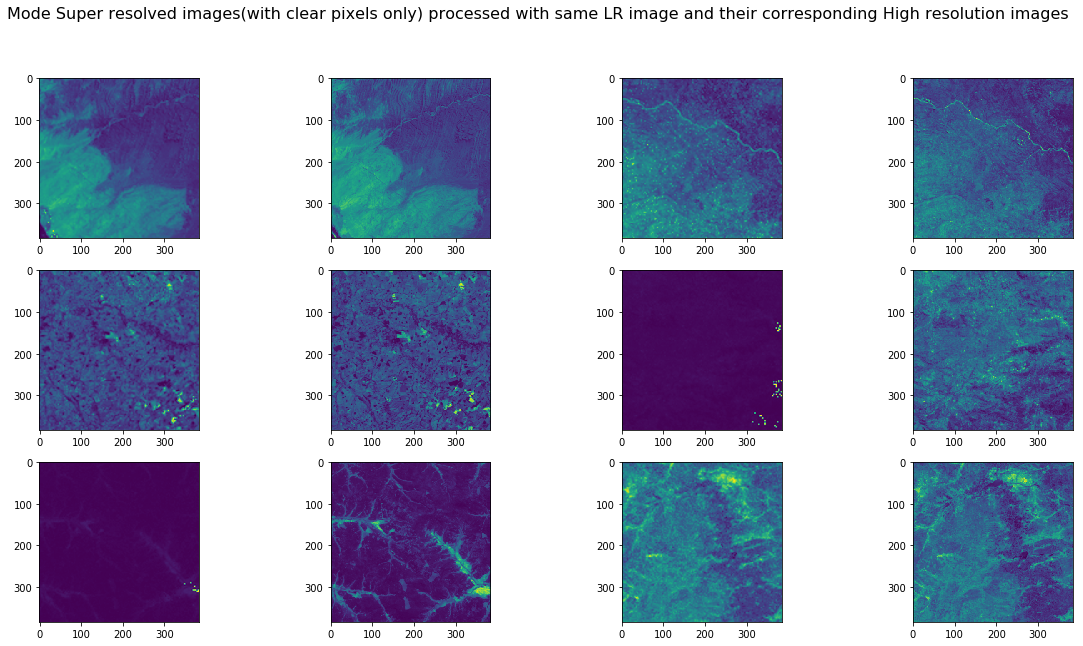

In [11]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mode Super resolved images(with clear pixels only) processed with same LR image and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mode_clear_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mode_clear_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [7]:
score = [score_image(i, s) for i,s in zip(upscaling_mode_clear_images, train_scene_path)]

In [8]:
print(np.mean(score))

1.291901747560423


In [9]:
mode_clear_images = [mode_image_scene(scene,with_clear = True,processing_type = "with_all_lr") for scene in train_scene_path]

In [16]:
upscaling_mode_clear_images = [bicubic_upscaling(image) for image in mode_clear_images]

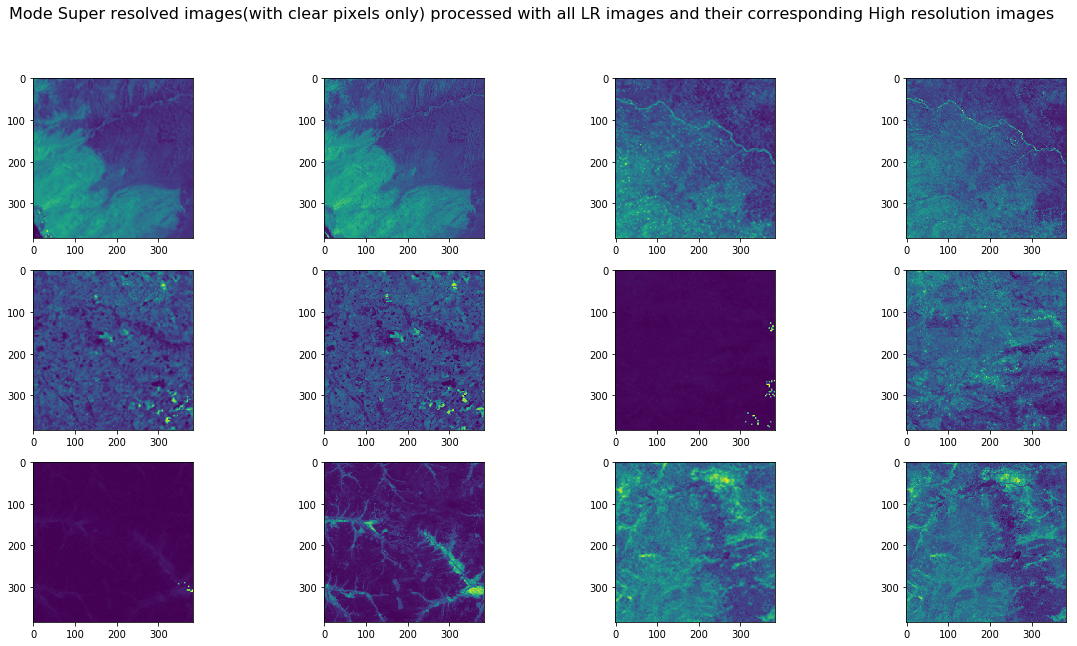

In [13]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Mode Super resolved images(with clear pixels only) processed with all LR images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(upscaling_mode_clear_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(load_image(train_scene_path[i] + "/HR.png",dtype=np.uint16),cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(upscaling_mode_clear_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(load_image(train_scene_path[i+1] + "/HR.png",dtype=np.uint16),cmap=None)
    
    j += 4

In [14]:
score = [score_image(i, s) for i,s in zip(upscaling_mode_clear_images, train_scene_path)]

In [15]:
print(np.mean(score))

1.291901747560423


## Plotting scores of Statistical operations

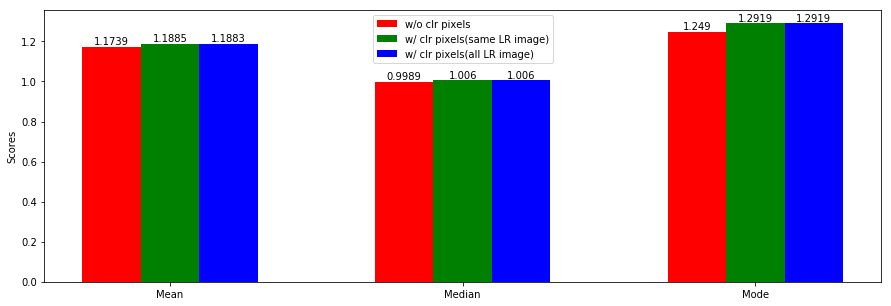

In [54]:
ind = np.arange(3)  
width = 0.2    
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)


yvals = [1.1739,0.9989,1.249]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1.1885,1.006,1.2919]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [1.1883,1.006,1.2919]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(index+width)
ax.set_xticklabels( ('Mean', 'Median', 'Mode') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('w/o clr pixels', 'w/ clr pixels(same LR image)', 'w/ clr pixels(all LR image)') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h, h, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Conclusions: